

### Data
This assignment uses a dataset of advertised apartment rentals in the USA, and the original dataset can be found on [UC Irvine's Machine Learning Repository](http://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified).  However, please use the dataset provided in Brightspace as some values have been changed and features deleted. The dataset provided through Brightspace contains 10,000 instances and 10 columns.

The columns in the file are as follows:

    - id : unique identifier of apartment
    - latitude : latitude where the apartment is located
    - longitude : longitude where the apartment is located
    - bathrooms : number of bathrooms
    - bedrooms : number of bedrooms
    - fee : Y/N does apartment have fee?
    - has_photo : Y/N does apartment listing have photo?
    - pets_allowed : what pets are allowed dogs/cats etc.
    - square_feet : size of the apartment in square feet
    - price : rental price of apartment (This will be our target)

    The dataset comprises 10,000 instances across 10 columns. Notably, the `bathrooms`, `bedrooms`, and `pets_allowed` columns contain instances with missing data.




### Table of Contents 
1. [Standard Imports](#import)
2. [Get the Data](#data)
3. [Explore the Data](#explore)
4. [Prepare the Data](#prepare)
5. [Model Selection & Evaluation](#model_selection)
6. [Final Model Evaluation](#final_model)
 

## Standard Imports<a name="import"></a>


In [2]:
# standard imports
import pandas as pd
import numpy as np



## Get the Data<a name="data"></a>



In [3]:

apartments= pd.read_csv('apartments_for_rent.csv')
#apartments.head()

In [4]:
# check basic info about dataset
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10000 non-null  int64  
 1   latitude      10000 non-null  float64
 2   longitude     10000 non-null  float64
 3   bathrooms     9967 non-null   float64
 4   bedrooms      9994 non-null   float64
 5   fee           10000 non-null  object 
 6   has_photo     10000 non-null  object 
 7   pets_allowed  5837 non-null   object 
 8   square_feet   10000 non-null  int64  
 9   price         10000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 781.4+ KB


In [33]:
apartments.columns

Index(['id', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'fee',
       'has_photo', 'pets_allowed', 'square_feet', 'price'],
      dtype='object')

In [34]:
# The "id" column contains information that is not pertinent to our current task.
apartments['id'].head()

0    5668626895
1    5664597177
2    5668626833
3    5659918074
4    5668626759
Name: id, dtype: int64

In [35]:
# the "fee" column exhibits uniform values across all instances within the dataset.
apartments['fee'].value_counts()

fee
No    10000
Name: count, dtype: int64

In [3]:

apartments=apartments.drop(['id','fee'], axis=1)
apartments.columns

Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'has_photo',
       'pets_allowed', 'square_feet', 'price'],
      dtype='object')

In [37]:

price_target=apartments['price']


In [4]:

apartments_features=apartments.drop('price',axis=1)
#apartments_features=apartments
apartments_features

,latitude,longitude,bathrooms,bedrooms,has_photo,pets_allowed,square_feet
0,38.9057,-76.9861,NaN,0.0,Thumbnail,NaN,101
1,37.9680,-87.6621,NaN,1.0,Thumbnail,NaN,106
2,38.8910,-77.0816,1.0,0.0,Thumbnail,NaN,107
3,47.6160,-122.3275,1.0,0.0,Thumbnail,NaN,116
4,38.8738,-77.1055,NaN,0.0,Thumbnail,NaN,125
...,...,...,...,...,...,...,...
9995,44.9000,-93.3233,4.0,5.0,Thumbnail,NaN,6300
9996,34.4331,-119.6331,8.0,6.0,Thumbnail,NaN,8716
9997,39.0287,-77.2409,8.0,6.0,Thumbnail,NaN,11318
9998,40.7716,-73.9876,NaN,1.0,Thumbnail,NaN,40000


In [5]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(apartments_features,price_target,test_size=0.20, random_state=42)


NameError: name 'price_target' is not defined

## Explore the Data<a name="explore"></a>


In [40]:
# check descriptive statistics
X_train.describe()

,latitude,longitude,bathrooms,bedrooms,square_feet
count,8000.000000,8000.000000,7974.000000,7994.000000,8000.000000
mean,37.638087,-94.763954,1.382242,1.750188,945.434500
std,5.523883,15.818233,0.612889,0.950951,532.799944
min,21.315500,-158.022100,1.000000,0.000000,106.000000
25%,33.595300,-101.858700,1.000000,1.000000,650.000000
50%,38.648700,-93.737500,1.000000,2.000000,804.000000
75%,41.271500,-82.383300,2.000000,2.000000,1100.000000
max,61.594000,-70.191600,8.000000,9.000000,11318.000000


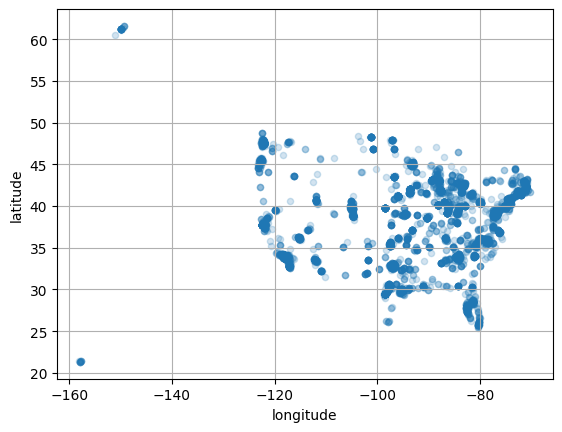

In [41]:
import matplotlib.pyplot as plt

# create scatterplot of all rentals
X_train.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

To analyze our categorical features, we can inspect the distribution of values by examining their respective value counts percentages.

In [42]:
#  check value count percentages for "has_photo" feature
X_train['has_photo'].value_counts(normalize=True)

has_photo
Thumbnail    0.89150
Yes          0.09075
No           0.01775
Name: proportion, dtype: float64

In [43]:
#  check value count percentages for "pets_allowed" feature
X_train['pets_allowed'].value_counts(normalize=True)

pets_allowed
Cats,Dogs    0.897220
Cats         0.080586
Dogs         0.022193
Name: proportion, dtype: float64

Now we can plot select numerical features and the rental prices against each other.

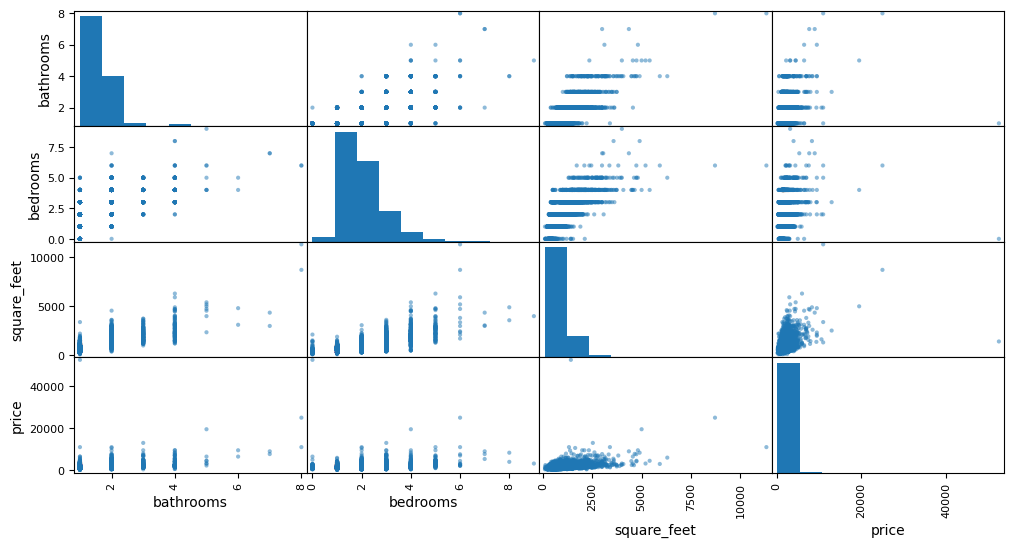

In [44]:
# plot select numeric values
from pandas.plotting import scatter_matrix

# select only a few numeric attributes from the training data
col_attributes = ['bathrooms','bedrooms','square_feet']

# combine training features and target into DataFrame
combined_df = pd.concat([X_train[col_attributes], y_train], axis=1)


scatter_matrix(combined_df, figsize=(12, 6))
plt.show()

In [45]:
# select attributes
col_attributes_2 = ['latitude','longitude','bathrooms','bedrooms','square_feet']

# create new combined DataFrame that includes longitude and latitude
combined_df_2 = pd.concat([X_train[col_attributes_2], y_train], axis=1)

# check correlations
corr_matrix = combined_df_2.corr()
corr_matrix["price"].sort_values(ascending=False)

price          1.000000
square_feet    0.456036
bathrooms      0.394160
bedrooms       0.298313
latitude       0.017938
longitude     -0.181943
Name: price, dtype: float64

## Prepare the Data<a name="prepare"></a>

### Pipeline



In [46]:

from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer

num_pipeline= make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler()
)


In [47]:

from sklearn.preprocessing import OneHotEncoder

cat_pipeline=make_pipeline(
    (SimpleImputer(strategy='constant', fill_value='No_Pets')),
                                (  OneHotEncoder(drop='first'))
)


### Column Transformer

Column Transformer to pass numeric data to the `num_pipeline` and categorical features to the `cat_pipeline'.



In [48]:


from sklearn.compose import ColumnTransformer 

num_attributes=[ 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'square_feet']
cat_attributes=['has_photo', 'pets_allowed']

preprocessing= ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline, num_attributes),
    ('cat_pipeline',cat_pipeline,cat_attributes )
], remainder='passthrough')

#X_train_prepared= preprocessing.fit_transform(X_train)
X_train_prepared= preprocessing.fit_transform(X_train)

## Model Selection & Evaluation<a name="model_selection"></a>


In [49]:


from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()

lin_reg.fit(X_train_prepared,y_train)

LinearRegression()

In [50]:
# perform a 10-fold cross validation using the `lin_reg` model

from sklearn.model_selection import cross_val_score

lin_reg_rmses = -cross_val_score(lin_reg, X_train_prepared, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [51]:
pd.Series(lin_reg_rmses).describe()

count      10.000000
mean      889.858340
std       376.497817
min       656.297734
25%       703.231636
50%       752.891579
75%       904.683403
max      1920.415202
dtype: float64

In [52]:
from sklearn.ensemble import RandomForestRegressor

# instantiate a RandomForestRegressor class
forest_reg = RandomForestRegressor(random_state=42) 

# fit the model
forest_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(random_state=42)

In [53]:
# cross validation
forest_rmses = -cross_val_score(forest_reg, X_train_prepared, y_train,
                                scoring="neg_root_mean_squared_error", cv=10)

# check cross validation scores
pd.Series(forest_rmses).describe()

count      10.000000
mean      692.806541
std       414.544265
min       399.456773
25%       504.282052
50%       595.845346
75%       652.569025
max      1837.508391
dtype: float64

The Random Forest algorithm resulted in a substantial reduction of over 22% in the average RMSE score, which is a positive outcome. However, it's worth noting that the overall RMSE remains relatively high when compared to the median value of apartment prices. 


## Final Model Evaluation<a name="final_model"></a>


In [54]:

from sklearn.metrics import root_mean_squared_error

X_test_prepared= preprocessing.transform(X_test)
final_predictions= forest_reg.predict(X_test_prepared)
final_rmse= round(root_mean_squared_error(y_test,final_predictions),2)
final_rmse

464.09